In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [2]:
url="https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/mushrooms.csv"
df = pd.read_csv(url)

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])


In [3]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [4]:
one_hot = OneHotEncoder()
X_train = one_hot.fit_transform(X_train)
X_test = one_hot.transform(X_test)

In [5]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1, 21)}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='f1')

In [6]:
best_k = grid.best_params_['n_neighbors']

knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)

In [7]:
confusion_matrix(y_test, y_pred)

array([[842,   0],
       [  0, 783]], dtype=int64)

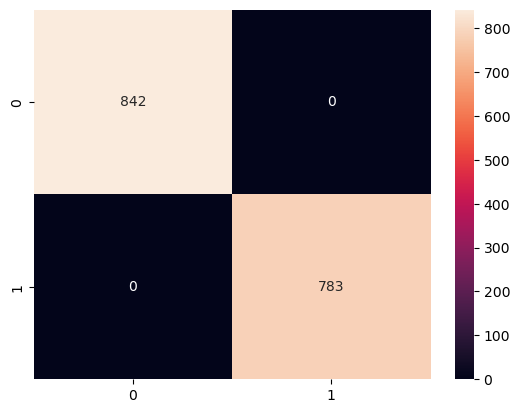

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



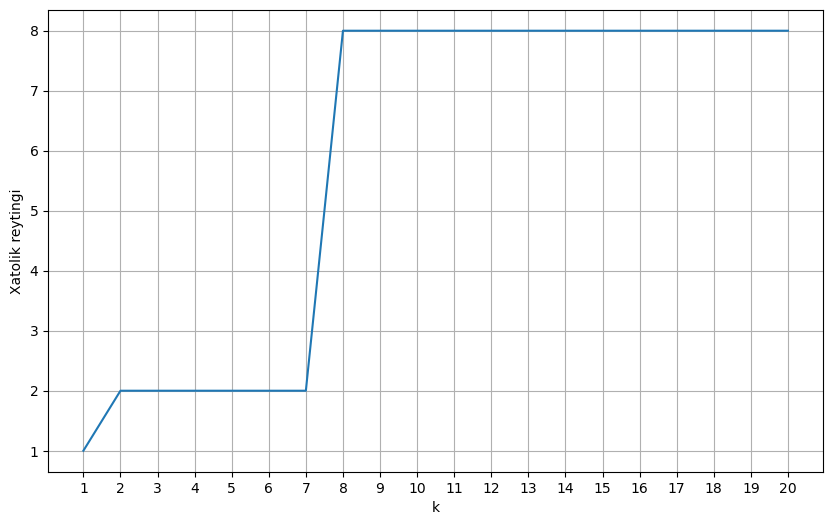

In [12]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], grid.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('k')
plt.ylabel('Xatolik reytingi')
plt.grid()
plt.show()

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pre = log_reg.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pre)

array([[842,   0],
       [  1, 782]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

